In [1]:
print("PORTFOLIO WITH RANDOM WEIGHTS")

PORTFOLIO WITH RANDOM WEIGHTS


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('short.csv')
df

,SCHIGPA,NORBMPP,NOGDBIG,ASHSAPM,JMRRIGH
0,53.5000,23.3525,113.88,1.4506,14.42
1,53.2200,23.3815,113.69,1.4491,14.44
2,52.9400,23.6502,114.42,1.4491,14.45
3,53.0200,23.6399,114.35,1.4575,14.45
4,52.8400,23.6349,114.67,1.4582,14.46
...,...,...,...,...,...
621,66.6402,32.9171,127.43,1.6680,16.12
622,66.3498,32.9220,128.55,1.6679,16.15
623,65.5106,32.8074,129.09,1.6762,16.14
624,66.4864,32.8013,129.78,1.6754,16.19


In [4]:
ind_er = np.log(df/df.shift(1)).mean()*252
ind_er

SCHIGPA     0.087622
NORBMPP     0.136993
NOGDBIG     0.054896
ASHSAPM     0.060873
JMRRIGH     0.050153
dtype: float64

In [5]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,SCHIGPA,NORBMPP,NOGDBIG,ASHSAPM,JMRRIGH
SCHIGPA,1.000000,0.072608,0.014389,0.017628,0.070370
NORBMPP,0.072608,1.000000,0.203734,-0.017880,0.122314
NOGDBIG,0.014389,0.203734,1.000000,0.171686,0.417622
ASHSAPM,0.017628,-0.017880,0.171686,1.000000,0.333890
JMRRIGH,0.070370,0.122314,0.417622,0.333890,1.000000


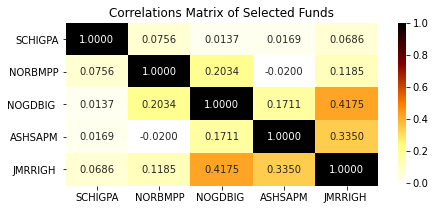

In [37]:
fig,ax = plt.subplots(figsize= (7,3))
sns.heatmap(df.pct_change().corr(method = 'pearson'), ax=ax, cmap='afmhot_r', annot=True, fmt=".4f")
#spearman
ax.set_title('Correlations Matrix of Selected Funds')
plt.show('images/chart1')

In [7]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,SCHIGPA,NORBMPP,NOGDBIG,ASHSAPM,JMRRIGH
SCHIGPA,2.002579e-04,0.000017,8.353966e-07,0.000001,0.000004
NORBMPP,1.709143e-05,0.000277,1.390406e-05,-0.000002,0.000009
NOGDBIG,8.353966e-07,0.000014,1.683261e-05,0.000004,0.000007
ASHSAPM,1.401205e-06,-0.000002,3.956490e-06,0.000032,0.000008
JMRRIGH,4.281685e-06,0.000009,7.366983e-06,0.000008,0.000018


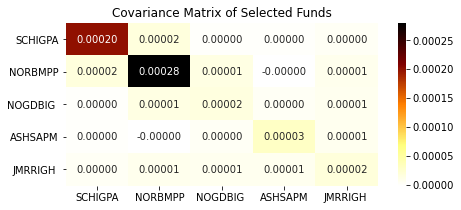

In [40]:
fig,ax = plt.subplots(figsize= (7,3))
sns.heatmap(df.pct_change().cov(), ax=ax, cmap='afmhot_r', annot=True, fmt=".5f")
#spearman
ax.set_title('Covariance Matrix of Selected Funds')
plt.show('images/chart1')

In [9]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
ann_sd

SCHIGPA     0.224644
NORBMPP     0.264060
NOGDBIG     0.065129
ASHSAPM     0.089166
JMRRIGH     0.068254
dtype: float64

In [10]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
SCHIGPA,0.087622,0.224644
NORBMPP,0.136993,0.264060
NOGDBIG,0.054896,0.065129
ASHSAPM,0.060873,0.089166
JMRRIGH,0.050153,0.068254


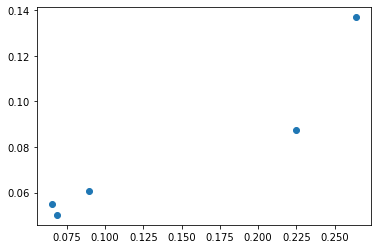

In [11]:
import matplotlib.pyplot as plt
x = ann_sd # RISK
y = ind_er # Return
plt.scatter(x, y)
plt.show()

In [12]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(df.columns)
num_portfolios = 10000

In [13]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
 # weights
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(252) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [14]:
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(df.columns.tolist()):
 #print(counter, symbol)
 data[symbol+'weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,SCHIGPAweight,NORBMPPweight,NOGDBIG weight,ASHSAPMweight,JMRRIGH weight
0,0.078519,0.082994,0.136806,0.234821,0.149690,0.199430,0.279253
1,0.075847,0.074486,0.115822,0.196414,0.260350,0.285700,0.141714
2,0.082481,0.096611,0.010506,0.321773,0.238390,0.266839,0.162493
3,0.083311,0.092388,0.210395,0.250713,0.137946,0.265685,0.135261
4,0.065641,0.071268,0.197091,0.030019,0.032459,0.498358,0.242073


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

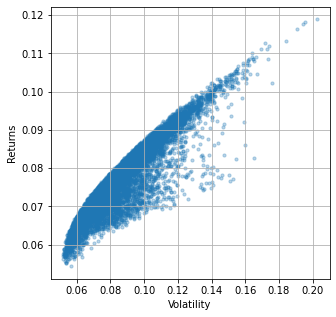

In [15]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [16]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns           0.057502
Volatility        0.052006
SCHIGPAweight     0.045378
NORBMPPweight     0.017029
NOGDBIG weight    0.453131
ASHSAPMweight     0.188513
JMRRIGH weight    0.295948
Name: 5132, dtype: float64

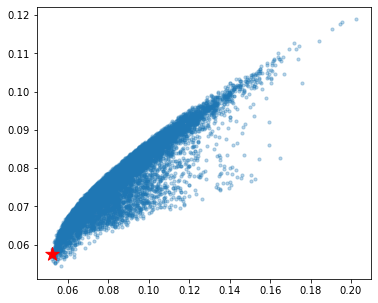

In [17]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [18]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns           0.063477
Volatility        0.055150
SCHIGPAweight     0.067803
NORBMPPweight     0.069065
NOGDBIG weight    0.390272
ASHSAPMweight     0.273740
JMRRIGH weight    0.199119
Name: 1292, dtype: float64

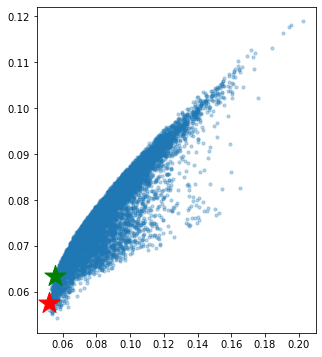

In [19]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [20]:
#Sharpe ratio for optimal portfolio using a rf=0.01

Returns = 0.073345
Volatility = 0.049823
Risk_premium = 0.063345   #Risk premium = Expected return - Risk-free rate
Sharpe = print(Risk_premium/Volatility)

1.2714007586857476


In [21]:
print("PORTFOLIO WITH EQUAL WEIGHTS")

PORTFOLIO WITH EQUAL WEIGHTS


In [22]:
Prices = pd.read_csv('short.csv')
Prices

,SCHIGPA,NORBMPP,NOGDBIG,ASHSAPM,JMRRIGH
0,53.5000,23.3525,113.88,1.4506,14.42
1,53.2200,23.3815,113.69,1.4491,14.44
2,52.9400,23.6502,114.42,1.4491,14.45
3,53.0200,23.6399,114.35,1.4575,14.45
4,52.8400,23.6349,114.67,1.4582,14.46
...,...,...,...,...,...
621,66.6402,32.9171,127.43,1.6680,16.12
622,66.3498,32.9220,128.55,1.6679,16.15
623,65.5106,32.8074,129.09,1.6762,16.14
624,66.4864,32.8013,129.78,1.6754,16.19


<AxesSubplot:title={'center':'Stocks daily returns'}>

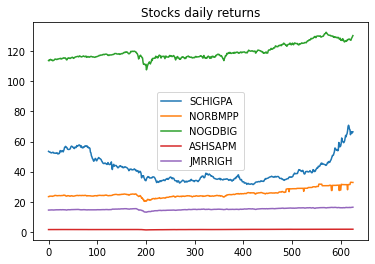

In [23]:
Prices.plot(title='Stocks daily returns')

In [24]:
Ann_Rets = np.log(df/df.shift(1)).mean()*252
Ann_Rets

SCHIGPA     0.087622
NORBMPP     0.136993
NOGDBIG     0.054896
ASHSAPM     0.060873
JMRRIGH     0.050153
dtype: float64

In [25]:
Rets = np.log(df/df.shift(1))
Rets

,SCHIGPA,NORBMPP,NOGDBIG,ASHSAPM,JMRRIGH
0,NaN,NaN,NaN,NaN,NaN
1,-0.005247,0.001241,-0.001670,-0.001035,0.001386
2,-0.005275,0.011426,0.006400,0.000000,0.000692
3,0.001510,-0.000436,-0.000612,0.005780,0.000000
4,-0.003401,-0.000212,0.002795,0.000480,0.000692
...,...,...,...,...,...
621,0.031679,0.000900,0.000000,0.000000,0.000000
622,-0.004367,0.000149,0.008751,-0.000060,0.001859
623,-0.012729,-0.003487,0.004192,0.004964,-0.000619
624,0.014785,-0.000186,0.005331,-0.000477,0.003093


In [26]:
AvgRets = np.log(df/df.shift(1)).mean()
AvgRets

SCHIGPA     0.000348
NORBMPP     0.000544
NOGDBIG     0.000218
ASHSAPM     0.000242
JMRRIGH     0.000199
dtype: float64

In [27]:
Ann = np.log(df/df.shift(1)).mean() *252
Ann

SCHIGPA     0.087622
NORBMPP     0.136993
NOGDBIG     0.054896
ASHSAPM     0.060873
JMRRIGH     0.050153
dtype: float64

In [28]:
cov_matrix = Prices.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,SCHIGPA,NORBMPP,NOGDBIG,ASHSAPM,JMRRIGH
SCHIGPA,2.002579e-04,0.000017,8.353966e-07,0.000001,0.000004
NORBMPP,1.709143e-05,0.000277,1.390406e-05,-0.000002,0.000009
NOGDBIG,8.353966e-07,0.000014,1.683261e-05,0.000004,0.000007
ASHSAPM,1.401205e-06,-0.000002,3.956490e-06,0.000032,0.000008
JMRRIGH,4.281685e-06,0.000009,7.366983e-06,0.000008,0.000018


In [29]:
# Randomly weighted portfolio's variance
w = {'SCHIGPA':0.20,'NORBMPP':0.20,'NOGDBIG':0.20,'ASHSAPM':0.20,'JMRRIGH':0.20}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*252)**(0.5)
print (port_var)
print (port_var*252)

2.168591458864765e-05
0.005464850476339208


In [30]:
Ann_port_std

0.0739246269949278

In [31]:
w = [0.20, 0.20, 0.20, 0.20, 0.20]
port_er = (w*Ann).sum()
port_er

0.07810738091727591

In [32]:
#Sharpe ratio for optimal portfolio using a rf=0.01

Returns = 0.06330311
Volatility = 0.038276
Risk_premium = 0.05330311   #Risk premium = Expected return - Risk-free rate
Sharpe = print(Risk_premium/Volatility)

1.392598756400878
